In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline
import glob
import os
from collections import Counter
import pandas as pd
import time

In [2]:
#to desaturate the image by turing pixels into black or white based on their value. 
#lighter pixels are turned white and darker pixels are turned black.
def threshold(img_array):
    row_avg=[]
    for eachrow in img_array:
        row_avg.append(np.mean(eachrow))
    avg_color=np.mean(row_avg)
    #print(avg_color)
    
    new_image=np.eye(len(img_array))
    
    for row in range(len(img_array)):
        for pixel in range(len(img_array[row])):
            if img_array[row][pixel]>=avg_color:
                new_image[row][pixel]=255
            else:
                new_image[row][pixel]=0
    new_image=np.array(new_image)
    return new_image

In [3]:
#a slightly different codeblock to threshold, same principle, just for different image format.
def threshold2(img_array):
    new=np.eye(len(img_array))
    rowavg=[]
    for eachrow in img_array:
        rowavg.append(np.mean(eachrow))
    avgcolor=np.mean(rowavg)
    for row in range(len(img_array)):
        for pixel in range(len(img_array[row])):
            if np.mean(img_array[row][pixel])>=avgcolor:
                new[row][pixel]=255
            else:
                new[row][pixel]=0
    new=np.array(new)
    return new
    

In [4]:
#to read the entire pixel row of the image and give a value to that row
#these values will be then passed to the KNN algorithm
def value(row):
    sum=0
    for i in range(len(row)):
        sum+=row[i]/float(i+1)
    return sum

In [5]:
#loading the extracted data on the program
df=pd.read_csv('train_file21.csv')

#replacing all missing data with NaN value
df.replace('?',np.nan,inplace=True)

#deleting the column with id, 1 in the argument indicates 'column', so this will delete the 'column' containing 'id'
#df.drop(['id'],1,inplace=True)
df.drop(['1'],1,inplace=True)
df.drop(['2'],1,inplace=True)
df.drop(['3'],1,inplace=True)
df.drop(['4'],1,inplace=True)
df.drop(['25'],1,inplace=True)
df.drop(['26'],1,inplace=True)
df.drop(['27'],1,inplace=True)
df.drop(['28'],1,inplace=True)
#delete all the rows that have NaN in them
dk=df.dropna()
full_data=dk.values.tolist()
headers = df.dtypes.index
header=headers.tolist()
header2=header[:-1]

In [7]:
points=[]
for column in header:
    points.append(df[column].tolist())


In [8]:
for point in points:
    del point[0]

In [15]:
#to arrange the data into a KNN acceptable format
dataset={}
for i in range(1,len(df)):
    point=[]
    label=df.loc[[i]]['label'].tolist()[0]
    if label not in dataset:
        dataset[label]=[]
    for head in header2:
        point.append(df.loc[[i]][head].tolist()[0])
    dataset[label].append(point)

In [16]:
#to count the apprearence of an element for KNN
def class_counts(data):
    counts={}
    for row in data:
        label=row
        if label not in counts:
            counts[label]=0
        counts[label]+=1
    return counts

In [17]:
def k_nearest_neighbours(data,predict,k):
    dist=[]
    rev={}
    for group in data:
        for features in data[group]:
            distance=np.linalg.norm(np.array(features)-np.array(predict))
            dist.append([distance,group])
    votes=[i[1] for i in sorted(dist)[:k]]
    uniqueVotes=class_counts(votes)
    
    #print('sorted distance: ',sorted(dist))
    #print('votes: ',uniqueVotes)
    
    for vote in uniqueVotes:
        rev[uniqueVotes[vote]]=vote
    #data[rev[max(rev)]].append(predict)
    return rev[max(rev)]

In [18]:
#print (k_nearest_neighbours(dataset,test,9))

In [19]:
image='C:/Users/hp/datascience/digit_recognition/img_93.jpg'
def predict(image,show=False):
    img=Image.open(image)
    if show:
        print('input image:')
        plt.grid(False)
        plt.imshow(img)
        plt.show()
    pred=[]
    image_array=np.array(img)
    try:
        image_t=threshold(image_array)
    except:
        image_t=threshold2(image_array)
    image_t_list=image_t.tolist()
    for row_data in image_t_list:
        pred.append(value(row_data))
    pred=pred[4:24]
    #pred
    answer=k_nearest_neighbours(dataset,pred,21)
    #print('predicted value: ',answer)
    return answer
    #return answer

input image:


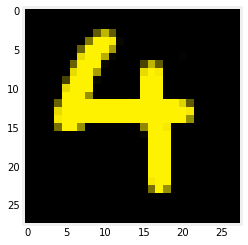

4.0

In [21]:
path='C:/Users/hp/datascience/digit_recognition/drawn.png'
predict(path,True)

In [22]:
#predict(image)

input image:


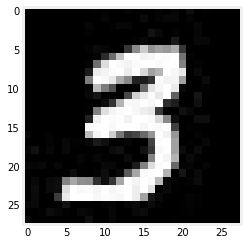

5.0


In [26]:
path='C:/Users/hp/datascience/digit_recognition/test/'
test_imgs=os.listdir(path)
i=np.random.randint(0,len(test_imgs))
pic=test_imgs[i]
#p=Image.open(path+pic)
p=predict(path+pic,True)
print(p)

In [27]:
path='C:/Users/hp/datascience/digit_recognition/test_data/'
test_folders=os.listdir(path)
#np.random.shuffle(test_folders)
count=0
true_prediction=0
pred_list={int(folder):{int(folder):0 for folder in test_folders} for folder in test_folders}
for folder in test_folders:
    
    img_list=os.listdir(path+folder)
    
    for image in img_list:
        
        image_path=path+folder+'/'+image
        prediction=str(int(predict(image_path)))
        pred_list[int(folder)][int(prediction)]+=1
        if prediction==folder:
            true_prediction+=1
                      
        count+=1
        
            
print('test size: ',count)
print('true predictions: ',true_prediction)
print('confidence: ',true_prediction/count)

test size:  1097
true predictions:  801
confidence:  0.7301731996353692


In [28]:
pred_list

{0: {0: 47, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 4, 9: 1},
 1: {0: 1, 1: 82, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 1},
 2: {0: 5, 1: 1, 2: 95, 3: 5, 4: 0, 5: 1, 6: 8, 7: 2, 8: 3, 9: 0},
 3: {0: 7, 1: 1, 2: 3, 3: 52, 4: 0, 5: 15, 6: 0, 7: 4, 8: 7, 9: 3},
 4: {0: 0, 1: 0, 2: 0, 3: 0, 4: 117, 5: 0, 6: 5, 7: 0, 8: 1, 9: 21},
 5: {0: 18, 1: 6, 2: 6, 3: 45, 4: 4, 5: 115, 6: 6, 7: 8, 8: 24, 9: 16},
 6: {0: 2, 1: 1, 2: 0, 3: 0, 4: 0, 5: 0, 6: 88, 7: 0, 8: 2, 9: 0},
 7: {0: 0, 1: 0, 2: 0, 3: 0, 4: 2, 5: 0, 6: 0, 7: 68, 8: 1, 9: 5},
 8: {0: 24, 1: 4, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1, 7: 3, 8: 65, 9: 3},
 9: {0: 0, 1: 0, 2: 0, 3: 0, 4: 10, 5: 2, 6: 0, 7: 3, 8: 1, 9: 72}}

In [29]:
#b: blue
#g: green
#r: red
#c: cyan
#m: magenta
#y: yellow
#k: black
#w: white
color=['b','g','r','c','m','y','k']

<function matplotlib.pyplot.show(*args, **kw)>

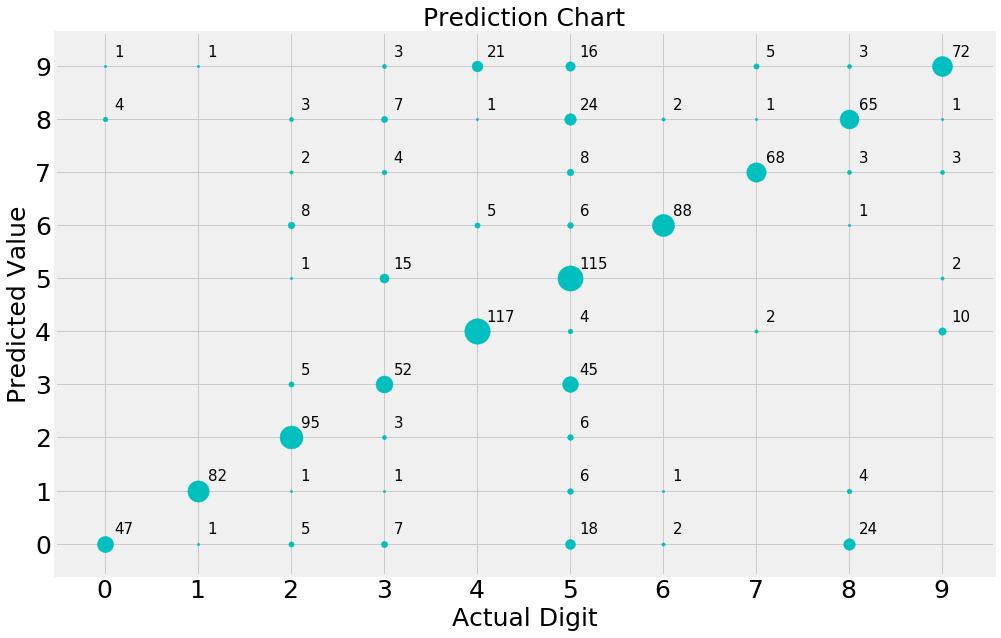

In [30]:
#plt.figure(figsize=(20,10))
plt.figure(figsize=(15,10))
plt.xlabel('Actual Digit',fontsize=25)
plt.ylabel('Predicted Value',fontsize=25)
plt.title('Prediction Chart',fontsize=25)
major_ticks = np.arange(0, 10, 1)                                              
plt.xticks(major_ticks,fontsize=25)                                                       
plt.yticks(major_ticks,fontsize=25) 
plt.grid(True)

for num in pred_list:
    num_data=pred_list[num]
    for pred in num_data:
        plt.scatter([num],[pred],color='c',s=pred_list[num][pred]*5.5)
        if pred_list[num][pred]>0:
            plt.annotate(str(pred_list[num][pred]),xy=(num,pred),fontsize=15, xytext=(10,10), textcoords='offset points')
        #plt.text(num,pred,str(pred_list[num][pred]))
plt.show